[[1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
  2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
  3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
  4.78947368 5.        ]
 [1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
  2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
  3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
  4.78947368 5.        ]
 [1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
  2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
  3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
  4.78947368 5.        ]
 [1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
  2.26315789 2.47368421 2.68421053 2.89473684 3.10526316 3.31578947
  3.52631579 3.73684211 3.94736842 4.15789474 4.36842105 4.57894737
  4.78947368 5.        ]
 [1.         1.21052632 1.42105263 1.63157895 1.84210526 2.05263158
  2.26315789 2.4

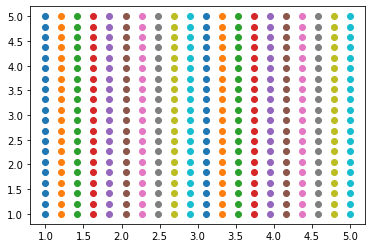

In [19]:
import matplotlib.pyplot as plt
import numpy as np

a0 = np.linspace(1,5,20)
# print(a0)

a1 = np.linspace(1,5,20)
# print(a1)

aa0,aa1 = np.meshgrid(a0,a1)
print(aa0)
print(aa1)
plt.plot( aa0, aa1, 'o')
plt.show()

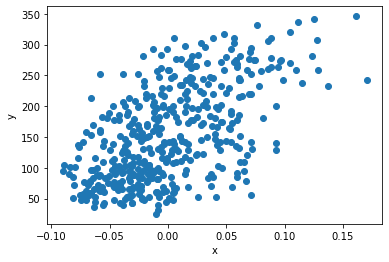

In [27]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt

# len(diabetes.data)
# len(diabetes.data[0])
x = diabetes.data[:, 2]
x
y = diabetes.target
len(y)
y.shape
y

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


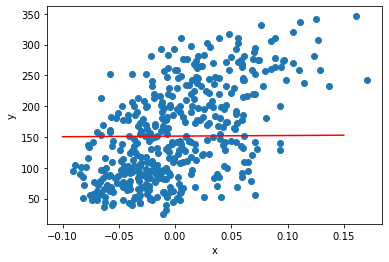

In [28]:
w = 1.0
b = 1.0
rate = 0.01
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_hat - y_i
    w = w - rate * err * x_i
    b = b - rate * err

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

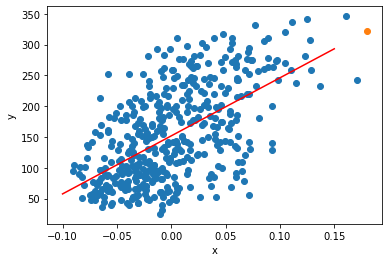

In [34]:
w = 1.0
b = 1.0
rate = 0.01
for i in range(1, 1000):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_hat - y_i
        w = w - rate * err * x_i
        b = b - rate * err
#     print(w)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
pt_new = 0.18 * w + b
plt.scatter(0.18, pt_new)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100, rate=0.01):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트

In [41]:
neuron = Neuron()
neuron.fit(x, y,1000)
neuron.w

942.7013592248313

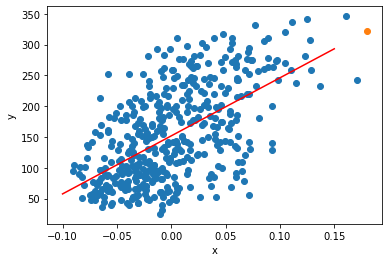

In [42]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
pt_new = 0.18 * neuron.w + neuron.b
plt.scatter(0.18, pt_new)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 로지스틱 회귀

In [50]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        return z
    
    def fit(self, x, y, epochs=100, rate=0.01):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트

In [54]:
x = np.array([1,2,3,4,5,6,7,8,12])
y = np.array([0,0,0,0,1,1,1,1,1])

In [55]:
neuron = Neuron()
neuron.fit(x,y,1000)
neuron.w

0.0565859641639946

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 양성종양
6 : 양성종양
7 : 악성종양
8 : 악성종양
12 : 악성종양


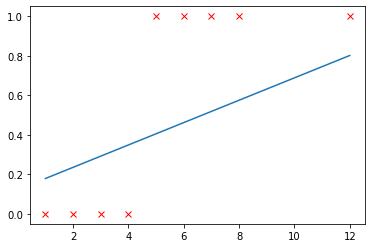

In [56]:
for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

### 오즈비 그래프 

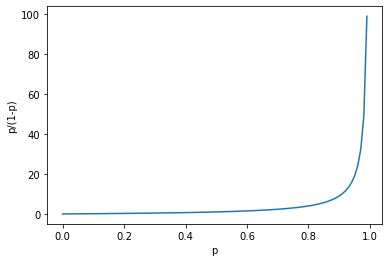

In [57]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

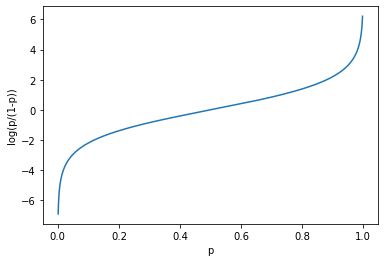

In [58]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

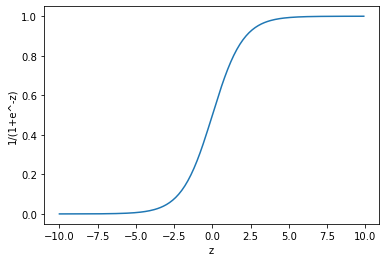

In [59]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
50 : 악성종양


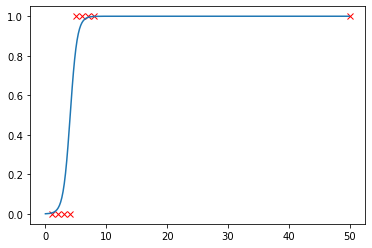

In [63]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.1*w_grad          # 가중치 업데이트
                self.b -= 0.1*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8, 50])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

### Binary Cross Entropy 함수

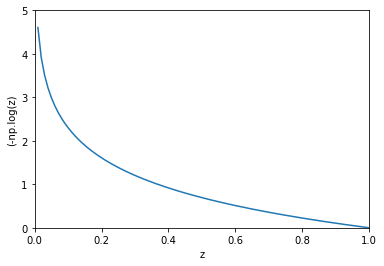

In [66]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

<ipython-input-67-101306523065>:2: RuntimeWarning: divide by zero encountered in log
  gs = [-np.log(1-z) for z in zs]
<ipython-input-67-101306523065>:2: RuntimeWarning: invalid value encountered in log
  gs = [-np.log(1-z) for z in zs]


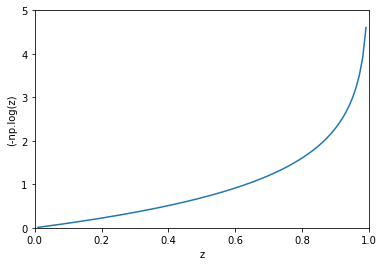

In [67]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

### 로지스틱 구현

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
len(cancer.data[0])

30

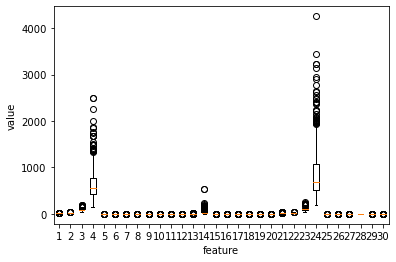

In [71]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [72]:
cancer.feature_names[[3,23]]

array(['mean area', 'worst area'], dtype='<U23')

In [81]:
x = cancer.data

In [82]:
y = cancer.target
np.unique(y, return_counts=True)


(array([0, 1]), array([212, 357], dtype=int64))

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
test_size=0.2, random_state=42)

In [86]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [87]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [90]:
print(x_train.shape[1])

30


In [95]:
a=np.array([1,2,3])
b=np.ones(a.shape[0])
c = np.sum(a*b)
c

6.0

In [105]:
import matplotlib.pyplot as  plt
import numpy as np

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w)  + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200,rate=0.01):
        self.w = np.ones(x.shape[1])
        self.b = 0

        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a >= 0.5

In [106]:
neuron = LogisticNeuron()
neuron.fit( x_train, y_train,1000)

In [107]:
# print( neuron.predict(x_test))
# print( neuron.predict(x_test)==y_test)
np.mean(neuron.predict(x_test)==y_test)

0.8157894736842105